Вот готовые **сводки по обеим таблицам** в формате `Markdown` — можешь просто вставить их как поясняющие ячейки в ноутбук перед анализом 👇

---

## 📘 Таблица `all_tg_1610.xlsx` — посты Telegram-каналов

Каждая строка соответствует **одному опубликованному посту** в Telegram.
Это справочник исходных сообщений, по которым затем собираются реакции.

| Поле             | Тип          | Описание                                                                                                                                                                                            |
| ---------------- | ------------ | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `id`             | `str (UUID)` | Уникальный идентификатор поста (глобальный ключ, используется для связи с таблицей реакций).                                                                                                        |
| `message_id`     | `int`        | Локальный числовой идентификатор поста внутри конкретного канала (например, t.me/channel/**275543**). Не уникален глобально.                                                                        |
| `date`           | `datetime`   | Время публикации поста в Telegram.                                                                                                                                                                  |
| `message`        | `str`        | Текст поста (контент публикации).                                                                                                                                                                   |
| `id_channel`     | `int`        | Идентификатор канала, где опубликован пост. Используется как дополнительный ключ при объединении.                                                                                                   |
| `message_vector` | `str`        | Строковое представление мешка слов — `'слово':count ...`. Хранит частоты терминов или токенов в сообщении. Можно использовать как BoW-фичи или игнорировать при построении собственных эмбеддингов. |


## 📊 Таблица `reactions_all_tg_1610.csv` — динамика реакций

Каждая строка соответствует **одному снимку состояния поста** на определённую дату (`cur_date`).
То есть один пост может встречаться здесь **много раз** — по количеству замеров.

| Поле              | Тип          | Описание                                                                             |
| ----------------- | ------------ | ------------------------------------------------------------------------------------ |
| `id`              | `str (UUID)` | Уникальный идентификатор записи (строки). Не совпадает с id поста.                   |
| `id_channel`      | `int`        | Идентификатор канала, совпадает с `all_tg_1610.id_channel`.                          |
| `cur_date`        | `datetime`   | Время, когда был снят замер метрик (дата/время фиксации просмотров, реакций и т.д.). |
| `message_id`      | `str (UUID)` | Идентификатор поста (глобальный ключ для связи с таблицей `all_tg_1610`).            |
| `views`           | `int`        | Общее количество просмотров на момент замера.                                        |
| `forwards`        | `int`        | Общее количество пересылок (репостов) на момент замера.                              |
| `replies`         | `int`        | Количество ответов/комментариев на момент замера.                                    |
| `reactions`       | `int`        | Количество реакций (эмодзи/лайков) на момент замера.                                 |
| `delta_views`     | `int`        | Прирост просмотров с предыдущего замера.                                             |
| `delta_forwards`  | `int`        | Прирост пересылок с предыдущего замера.                                              |
| `delta_replies`   | `int`        | Прирост комментариев с предыдущего замера.                                           |
| `delta_reactions` | `int`        | Прирост реакций с предыдущего замера.                                                |


In [51]:
import pandas as pd

re = pd.read_csv("/kaggle/input/tg-news/reactions_all_tg_1610.csv")
print(re.shape)
re.head()

(7752599, 12)


,id,id_channel,cur_date,message_id,views,forwards,replies,reactions,delta_views,delta_forwards,delta_replies,delta_reactions
0,0c98e18e-ec56-4721-b880-9f8395749f9c,18,2024-01-31,d06f44e5-47ac-4c9b-99ea-6139374da60b,31955,139,0,430,0,0,0,0
1,d849c837-090d-4155-bcbf-fb7313ece94a,18,2024-01-31,de1d5dd9-85b2-46cb-9d4f-535893c054fd,32483,253,0,469,0,0,0,0
2,9276d8ef-4acb-46b9-8c2e-ad0511fd7f93,18,2024-01-31,a30dfd3a-d534-4ee3-8c3e-b6e39fcb58f3,31860,138,0,396,0,0,0,0
3,633c4c02-a899-49cb-9312-2fe4dc274fe4,18,2024-01-31,8f6dace5-b8b1-4fec-af44-3e1752548f44,31991,175,0,964,0,0,0,0
4,72b46814-8c0f-4a66-9840-1a2f89f05d00,18,2024-01-31,cd3eb2da-02ff-4e36-b4d5-6cde23d34a03,31407,157,0,395,0,0,0,0


In [52]:
tg = pd.read_excel("/kaggle/input/tg-news/all_tg_1610.xlsx")
tg = tg.rename(columns={'id':'post_uuid'})  
print(tg.shape)
tg.head()

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


(123273, 6)


,post_uuid,message_id,date,message,id_channel,message_vector
0,e46cf62f-2d16-4c73-93b1-1b3952b95e3e,275548,2025-01-02 17:00:02,"Правительство Словакии обсудит меры, которые м...",3,'адекватн':11 'газ':18 'заяв':21 'зеленск':15 ...
1,792632e5-da04-4341-a674-f8405c8ddd71,275547,2025-01-02 16:40:53,В ДТП с туристическим автобусом в Таиланде пос...,3,'27':9 'автобус':5 'возвращен':31 'гостиниц':3...
2,dcb05245-5965-4003-81a5-421043394def,275546,2025-01-02 16:20:12,Премьер Израиля Нетаньяху выписан из больницы ...,3,'jerusalem':14 'post':15 'больниц':6 'выписа':...
3,e91db7c4-d272-4b0b-82f9-425016288476,275545,2025-01-02 15:54:29,Подозреваемый в подрыве автомобиля Tesla Cyber...,3,'cybertruck':6 'tesla':5 'автомобил':4 'вегас'...
4,c702e716-6806-497b-83ba-764eee4f82e3,275543,2025-01-02 15:32:55,Спецоперация. Обстановка и главные события на ...,3,'-27':33 '1200':16 '13':63 '155':96 '2':7 '202...


In [53]:
# Проверка покрытия реакций постами
coverage = re['message_id'].isin(tg['post_uuid']).mean()
print(f'Покрытие реакций постами: {coverage:.2%}')

# Проверка дублей (message_id + cur_date)
dupes = re.duplicated(subset=['message_id', 'cur_date']).sum()
print(f'Дубликатов по message_id+cur_date: {dupes}')


Покрытие реакций постами: 100.00%
Дубликатов по message_id+cur_date: 726005


In [54]:
re_sorted = re.sort_values(['message_id','cur_date','views'], ascending=[True,True,False])
re = re_sorted.drop_duplicates(subset=['message_id','cur_date'], keep='first')

In [55]:
tg["id_channel"].value_counts()

id_channel
3     39739
1     23522
4     14219
6     13603
18    12549
2     11724
5      7917
Name: count, dtype: int64

In [56]:
import pandas as pd
from datetime import timedelta
import numpy as np
   
tg['post_uuid'] = tg['post_uuid'].astype(str)
tg['id_channel'] = pd.to_numeric(tg['id_channel'], errors='coerce')

re['message_id'] = re['message_id'].astype(str) 
re['id_channel'] = pd.to_numeric(re['id_channel'], errors='coerce')

tg['date'] = pd.to_datetime(tg['date'], errors='coerce')          # дата публикации
re['cur_date'] = pd.to_datetime(re['cur_date'], errors='coerce')  # дата/время замера реакций

df = re.merge(
    tg[['post_uuid','id_channel','date','message', 'message_vector']],
    left_on=['message_id','id_channel'],
    right_on=['post_uuid','id_channel'],
    how='left',
    validate='m:1' 
)

# === 4) Sanity-check покрытия
n_total = len(re)
n_matched = df['date'].notna().sum()
print(f"Matched {n_matched}/{n_total} ({n_matched/n_total:.1%}) реакций к постам")

df['hours_since_post'] = (df['cur_date'] - df['date']).dt.total_seconds() / 3600

df = df[np.isfinite(df['hours_since_post']) & (df['hours_since_post'] >= 0)].copy()
df.head()

/tmp/ipykernel_39/1802787918.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re['message_id'] = re['message_id'].astype(str)
/tmp/ipykernel_39/1802787918.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re['id_channel'] = pd.to_numeric(re['id_channel'], errors='coerce')
/tmp/ipykernel_39/1802787918.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

Matched 7026594/7026594 (100.0%) реакций к постам


,id,id_channel,cur_date,message_id,views,forwards,replies,reactions,delta_views,delta_forwards,delta_replies,delta_reactions,post_uuid,date,message,message_vector,hours_since_post
1,00027151-a524-4d93-a820-116398fb81bb,3,2025-04-08,00027151-a524-4d93-a820-116398fb81bb,603269,415,0,0,111142,34,0,0,00027151-a524-4d93-a820-116398fb81bb,2025-04-07 11:53:51,"Европа делает ""самоубийственное движение"", ког...",'sputnik':53 'александр':14 'американц':16 'во...,12.1025
2,00027151-a524-4d93-a820-116398fb81bb,3,2025-04-09,00027151-a524-4d93-a820-116398fb81bb,619397,449,0,0,16128,34,0,0,00027151-a524-4d93-a820-116398fb81bb,2025-04-07 11:53:51,"Европа делает ""самоубийственное движение"", ког...",'sputnik':53 'александр':14 'американц':16 'во...,36.1025
3,00027151-a524-4d93-a820-116398fb81bb,3,2025-04-10,00027151-a524-4d93-a820-116398fb81bb,625475,449,0,0,6078,0,0,0,00027151-a524-4d93-a820-116398fb81bb,2025-04-07 11:53:51,"Европа делает ""самоубийственное движение"", ког...",'sputnik':53 'александр':14 'американц':16 'во...,60.1025
4,00027151-a524-4d93-a820-116398fb81bb,3,2025-04-11,00027151-a524-4d93-a820-116398fb81bb,628513,449,0,0,3038,0,0,0,00027151-a524-4d93-a820-116398fb81bb,2025-04-07 11:53:51,"Европа делает ""самоубийственное движение"", ког...",'sputnik':53 'александр':14 'американц':16 'во...,84.1025
5,00027151-a524-4d93-a820-116398fb81bb,3,2025-04-12,00027151-a524-4d93-a820-116398fb81bb,631523,449,0,0,3010,0,0,0,00027151-a524-4d93-a820-116398fb81bb,2025-04-07 11:53:51,"Европа делает ""самоубийственное движение"", ког...",'sputnik':53 'александр':14 'американц':16 'во...,108.1025


In [57]:
df.isna().mean().sort_values(ascending=False).head(10)

message_vector     0.000136
id                 0.000000
delta_forwards     0.000000
message            0.000000
date               0.000000
post_uuid          0.000000
delta_reactions    0.000000
delta_replies      0.000000
delta_views        0.000000
id_channel         0.000000
dtype: float64

<Axes: xlabel='hour'>

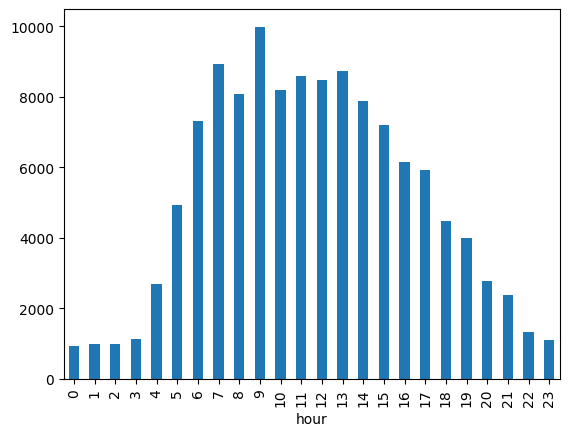

In [58]:
tg['dayofweek'] = tg['date'].dt.day_name()
tg['hour'] = tg['date'].dt.hour
tg.groupby('dayofweek').size().sort_index()
tg.groupby('hour').size().plot(kind='bar')

In [58]:
df[['views', 'forwards', 'replies', 'reactions',
    'delta_views', 'delta_forwards', 'delta_replies', 'delta_reactions']].corr()

,views,forwards,replies,reactions,delta_views,delta_forwards,delta_replies,delta_reactions
views,1.000000,0.362898,-0.135461,-0.530841,0.113789,0.034722,0.001488,0.022086
forwards,0.362898,1.000000,-0.073497,-0.296759,0.032309,0.087134,0.000853,0.010532
replies,-0.135461,-0.073497,1.000000,0.208787,-0.015582,-0.006610,0.008982,-0.014340
reactions,-0.530841,-0.296759,0.208787,1.000000,-0.059934,-0.023556,-0.002274,-0.033059
delta_views,0.113789,0.032309,-0.015582,-0.059934,1.000000,0.427709,0.002332,-0.000765
delta_forwards,0.034722,0.087134,-0.006610,-0.023556,0.427709,1.000000,0.001866,-0.003715
delta_replies,0.001488,0.000853,0.008982,-0.002274,0.002332,0.001866,1.000000,0.008946
delta_reactions,0.022086,0.010532,-0.014340,-0.033059,-0.000765,-0.003715,0.008946,1.000000


In [59]:
import pandas as pd
import numpy as np

df = df.sort_values(['message_id','cur_date'])
df['delta_h'] = df.groupby('message_id')['cur_date'].diff().dt.total_seconds() / 3600

# убираем совсем короткие интервалы (<0.1ч) и аномальные (>48ч)
df_filt = df.loc[df['delta_h'].between(0.1, 48)]
freq_stats = df_filt['delta_h'].describe(percentiles=[.25,.5,.75,.9,.95])
print(freq_stats)

count    6.758687e+06
mean     2.456233e+01
std      3.630388e+00
min      2.400000e+01
25%      2.400000e+01
50%      2.400000e+01
75%      2.400000e+01
90%      2.400000e+01
95%      2.400000e+01
max      4.800000e+01
Name: delta_h, dtype: float64


In [59]:
anomalies = df[(df['delta_replies'] < 0) | (df['delta_reactions'] < 0) | (df['hours_since_post'] < 0)]
print(anomalies.shape)
anomalies[['message_id','cur_date','delta_replies','delta_reactions', 'hours_since_post']].head()

(17904, 17)


,message_id,cur_date,delta_replies,delta_reactions,hours_since_post
36,0002bd57-00d6-4d1d-b9cf-7a16ea0a0346,2025-01-23,1,-511,31.558333
392,0006e10d-39d5-48fd-b5d8-3fbc732d09f4,2025-01-23,0,-84,1887.828889
1765,001550fe-05ce-4b78-9098-9737d541e034,2025-01-23,0,-113,2841.006667
2026,0015bce6-89d3-4730-a1ec-cfe57a228d3a,2025-01-23,0,-487,3868.064444
2271,001952ee-d7f8-4af7-afe3-f012f0cb2f52,2025-01-23,0,-86,4360.380556


In [60]:
for col in ['delta_views','delta_forwards','delta_replies','delta_reactions','hours_since_post']:
    df.loc[df[col] < 0, col] = 0

In [84]:
# Доля сообщений по каждому каналу
channel_share = (
    tg['id_channel']
    .value_counts(normalize=True)
    .rename_axis('id_channel')
    .reset_index(name='proportion')
    .sort_values('proportion', ascending=False)
)

# Вывод результата
channel_share


,id_channel,proportion
0,3,0.322366
1,1,0.190812
2,4,0.115346
3,6,0.110349
4,18,0.101798
5,2,0.095106
6,5,0.064223


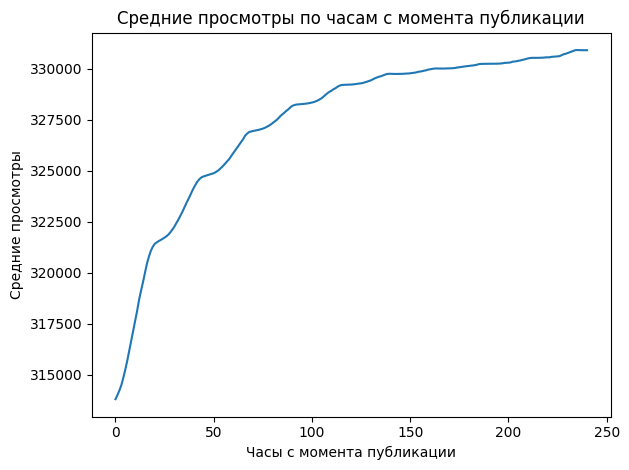

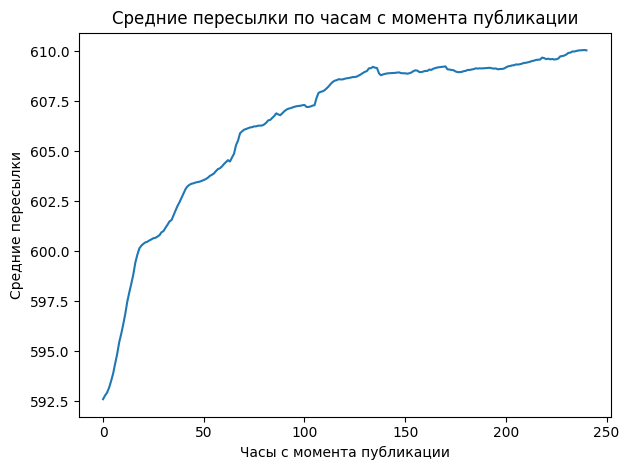

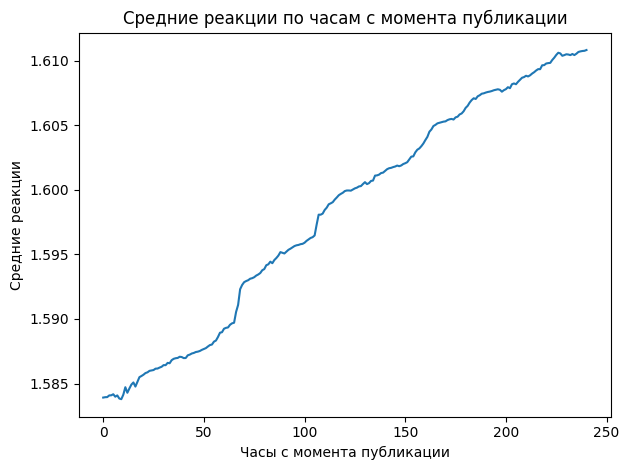

In [86]:
import numpy as np

HMAX = 240  # горизонт в часах для усреднённого профиля (0..144ч = 6 суток)
hours_grid = np.arange(0, HMAX+1, 1)

def hourly_curve_safe(group, metrics=('views','forwards','reactions'), hours=None):
    """
    Для одного поста строим почасовой ряд: на каждый h берём первое наблюдение с age >= h.
    Безопасно по индексам: не обращаемся к vals[idx], если idx == len(ages).
    """
    if hours is None:
        hours = np.arange(0, 145, 1)

    g = (group[['hours_since_post', *[m for m in metrics if m in group.columns]]]
         .dropna(subset=['hours_since_post'])
         .sort_values('hours_since_post'))

    ages = g['hours_since_post'].to_numpy()
    out = {'hour': hours}

    if ages.size == 0:
        for m in metrics:
            out[m] = np.nan
        return pd.DataFrame(out)

    # Индекс первого наблюдения, где age >= h
    idxs = np.searchsorted(ages, hours, side='left')

    for m in metrics:
        if m not in g.columns:
            out[m] = np.nan
            continue

        vals = g[m].to_numpy()

        # Безопасное заполнение: сначала NaN, затем только валидные индексы
        sel = np.full_like(hours, np.nan, dtype=float)
        mask = idxs < len(ages)
        sel[mask] = vals[idxs[mask]]
        out[m] = sel

    return pd.DataFrame(out)


curves = []
for (mid, ch), grp in df.groupby(['message_id','id_channel'], sort=False):
    hc = hourly_curve_safe(grp, metrics=('views','forwards','reactions'), hours=hours_grid)
    hc['message_id'] = mid
    hc['id_channel'] = ch
    curves.append(hc)

hourly_all = pd.concat(curves, ignore_index=True)

# Средние кривые по всем постам
avg_hourly = (hourly_all
              .groupby('hour')[['views','forwards','reactions']]
              .mean()
              .reset_index())


import matplotlib.pyplot as plt

plt.figure()
plt.plot(avg_hourly['hour'], avg_hourly['views'])
plt.title("Средние просмотры по часам с момента публикации")
plt.xlabel("Часы с момента публикации")
plt.ylabel("Средние просмотры")
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(avg_hourly['hour'], avg_hourly['forwards'])
plt.title("Средние пересылки по часам с момента публикации")
plt.xlabel("Часы с момента публикации")
plt.ylabel("Средние пересылки")
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(avg_hourly['hour'], avg_hourly['reactions'])
plt.title("Средние реакции по часам с момента публикации")
plt.xlabel("Часы с момента публикации")
plt.ylabel("Средние реакции")
plt.tight_layout()
plt.show()

In [44]:
# import numpy as np
# import pandas as pd

# # ---- ПАРАМЕТРЫ ГОРИЗОНТОВ ----
# HOURS = [24, 48, 72]#, 96, 120, 144, 168]  # можно расширять

# def values_at_h_safe(group: pd.DataFrame, hours: list, metrics=('views','forwards','reactions')) -> pd.DataFrame:
#     """
#     Для одного поста (group) возвращает таблицу: hour | <metric> для всех H из hours.
#     Берём первое наблюдение с age >= H (правильное поведение для кумулятивных метрик).
#     Безопасно работает при коротких рядах (где нет дальних часов) — будут NaN.
#     """
#     g = (group[['hours_since_post', *[m for m in metrics if m in group.columns]]]
#          .dropna(subset=['hours_since_post'])
#          .sort_values('hours_since_post'))
#     ages = g['hours_since_post'].to_numpy()

#     out = {'hour': np.array(hours, dtype=float)}
#     if ages.size == 0:
#         for m in metrics:
#             out[m] = [np.nan] * len(hours)
#         return pd.DataFrame(out)

#     idxs = np.searchsorted(ages, out['hour'], side='left')  # индекс первого age >= H

#     for m in metrics:
#         if m not in g.columns:
#             out[m] = [np.nan] * len(hours)
#             continue
#         vals = g[m].to_numpy()
#         sel = np.full(len(hours), np.nan, dtype=float)
#         mask = idxs < len(ages)
#         sel[mask] = vals[idxs[mask]]
#         out[m] = sel

#     return pd.DataFrame(out)

# # ---- РАСЧЁТ: по всем постам ----
# curves = []
# # groupby по глобальному ID поста (uuid из tg), а не по локальному message_id канала
# for pid, grp in df.groupby('id', sort=False):  # df['id'] — это tg.id
#     hc = values_at_h_safe(grp, HOURS, metrics=('views','forwards','reactions'))
#     for H in HOURS:
#         row = {'id': pid}
#         row[f'views_{H}h']     = float(hc.loc[hc['hour'] == H, 'views'].values[0])
#         row[f'forwards_{H}h']  = float(hc.loc[hc['hour'] == H, 'forwards'].values[0])
#         row[f'reactions_{H}h'] = float(hc.loc[hc['hour'] == H, 'reactions'].values[0])
#         curves.append(row)

# aggH = (pd.DataFrame(curves)
#           .groupby('id', as_index=False)  # на случай дубликатов защитимся агрегом "последний notna"
#           .agg(lambda s: s.ffill().bfill().iloc[0] if s.notna().any() else np.nan))

# tg_h = tg.merge(aggH, left_on='post_uuid', right_on='id', how='left')

# # (опционально) убрать дублирующий ключ справа
# tg_h = tg_h.drop(columns=['post_uuid'])

# print(tg_h.shape)
# tg_h.head()
tg_h = pd.read_csv("/kaggle/input/tg-news/tg_adj.csv")

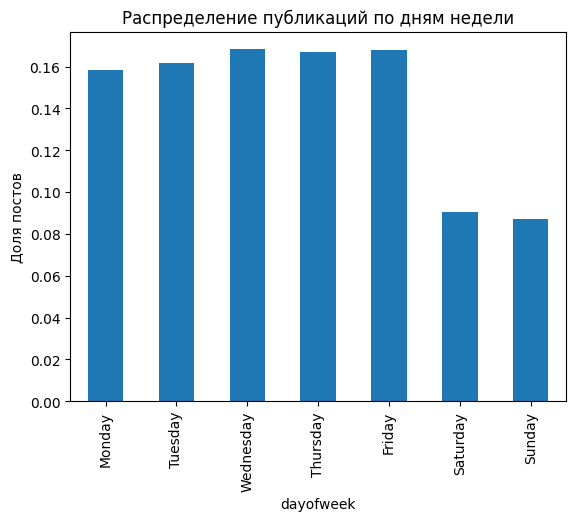

In [47]:
import matplotlib.pyplot as plt

posts_by_dow = tg_h['dayofweek'].value_counts(normalize=True).reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
posts_by_dow.plot(kind='bar', title='Распределение публикаций по дням недели')
plt.ylabel('Доля постов')
plt.show()

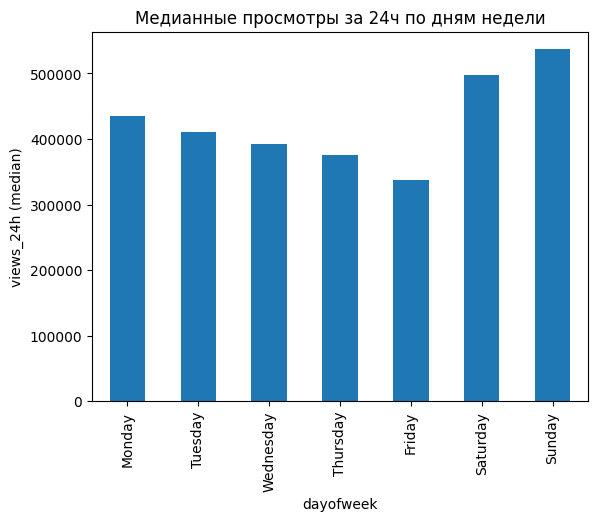

In [48]:
# усредняем просмотры на пост
views_by_dow = (tg_h.groupby('dayofweek')['views_24h']
                  .median()
                  .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']))

views_by_dow.plot(kind='bar', title='Медианные просмотры за 24ч по дням недели')
plt.ylabel('views_24h (median)')
plt.show()

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ожидаемые колонки в tg_h: date, id_channel, views_24h, forwards_24h, (опц.) reactions_24h, ...
tg_h['date'] = pd.to_datetime(tg_h['date'])
iso = tg_h['date'].dt.isocalendar()
tg_h['year'] = iso.year
tg_h['week'] = iso.week
tg_h['dow']  = tg_h['date'].dt.dayofweek
tg_h['hour'] = tg_h['date'].dt.hour
tg_h['hour_of_week'] = tg_h['dow']*24 + tg_h['hour']

# флаги наличия наблюдения на горизонте
for H in [24,48,72]:
    tg_h[f'has_{H}h'] = tg_h[f'views_{H}h'].notna().astype(int)

# поправка трафика выходных для конверсии (выходные ~60% от будней => домножаем на 1/0.6)
tg_h['fwd_rate_24h']   = tg_h['forwards_24h'] / tg_h['views_24h']

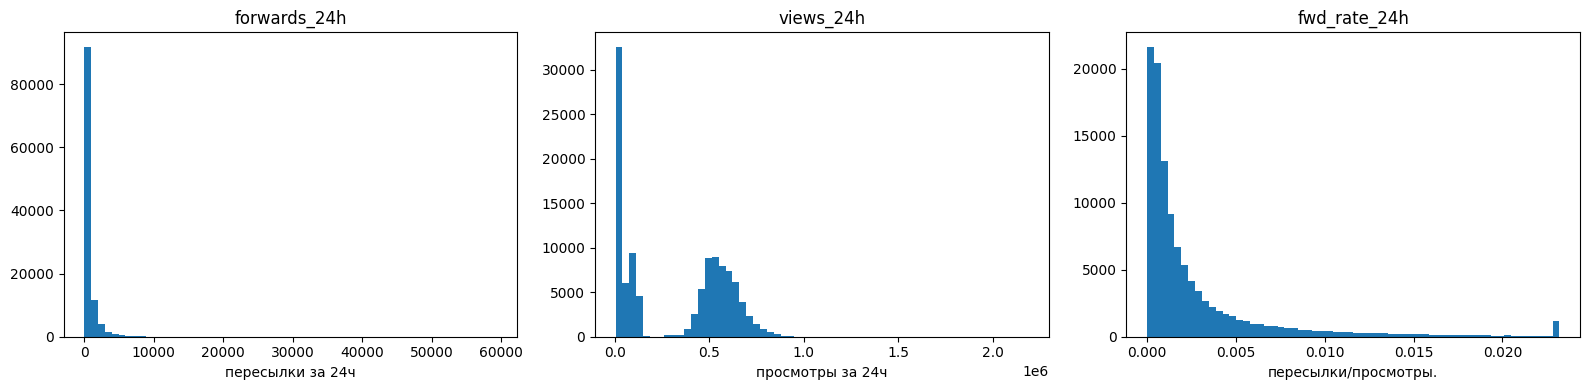

In [46]:
fig, ax = plt.subplots(1,3, figsize=(16,4))

x = tg_h['forwards_24h'].dropna()
ax[0].hist(x, bins=60)
ax[0].set_title('forwards_24h'); ax[0].set_xlabel('пересылки за 24ч'); 

x = tg_h['views_24h'].dropna()
ax[1].hist(x, bins=60)
ax[1].set_title('views_24h'); ax[1].set_xlabel('просмотры за 24ч'); 

r = tg_h['fwd_rate_24h'].replace([np.inf, -np.inf], np.nan).dropna()
r_clip = r.clip(upper=r.quantile(0.99))
ax[2].hist(r_clip, bins=60)
ax[2].set_title('fwd_rate_24h'); ax[2].set_xlabel('пересылки/просмотры.')
plt.tight_layout(); plt.show()


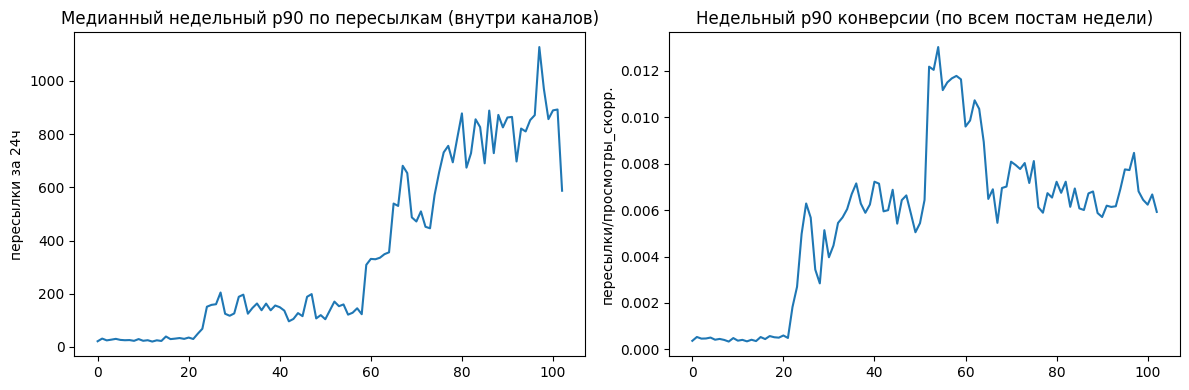

In [61]:
# p90 по (канал, неделя)
q90_ch_w = (tg_h.dropna(subset=['forwards_24h'])
              .groupby(['id_channel','year','week'])['forwards_24h']
              .quantile(0.90).rename('q90_forw_ch_w')).reset_index()

# p90 по неделе (без разреза по каналу) — для конверсии
q90_w_rate = (tg_h.dropna(subset=['fwd_rate_24h'])
               .groupby(['year','week'])['fwd_rate_24h']
               .quantile(0.90).rename('q90_rate_w')).reset_index()

# визуализация динамики порогов
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(q90_ch_w.groupby(['year','week'])['q90_forw_ch_w'].median().values)
ax[0].set_title('Медианный недельный p90 по пересылкам (внутри каналов)')
ax[0].set_ylabel('пересылки за 24ч')

ax[1].plot(q90_w_rate['q90_rate'].values)
ax[1].set_title('Недельный p90 конверсии (по всем постам недели)')
ax[1].set_ylabel('пересылки/просмотры')
plt.tight_layout(); plt.show()


In [62]:
# A: вирусность по пересылкам (внутри канала-недели: топ-10%)
tgA = tg_h.merge(q90_ch_w, on=['id_channel','year','week'], how='left')
tgA['viral_A_24h'] = (tgA['forwards_24h'] >= tgA['q90_forw_ch_w']).fillna(0).astype(int)

# B: вирусность по конверсии (внутри недели: топ-10%)
tgB = tg_h.merge(q90_w_rate, on=['year','week'], how='left')
tgB['viral_B_24h'] = (tgB['fwd_rate_24h'] >= tgB['q90_rate_w']).fillna(0).astype(int)

shareA = tgA['viral_A_24h'].mean()
shareB = tgB['viral_B_24h'].mean()
print(f"Доля вирусных A (пересылки внутри канала-недели): {shareA:.2%}")
print(f"Доля вирусных B (конверсия внутри недели):       {shareB:.2%}")

Доля вирусных A (пересылки внутри канала-недели): 9.21%
Доля вирусных B (конверсия внутри недели):       9.03%


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)


viral_B_24h       0     1
viral_A_24h              
0            127236  9354
1              8542  5097


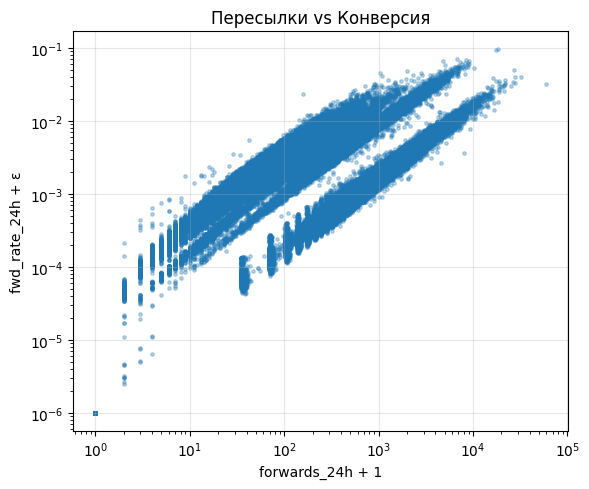

In [63]:
tmp = tgA[['message_id','viral_A_24h']].merge(
      tgB[['message_id','viral_B_24h']], on='message_id', how='inner')

print(pd.crosstab(tmp['viral_A_24h'], tmp['viral_B_24h']))

plt.figure(figsize=(6,5))
plt.scatter(tg_h['forwards_24h']+1, (tg_h['fwd_rate_24h']+1e-6), s=6, alpha=0.3)
plt.xscale('log'); plt.yscale('log')
plt.xlabel('forwards_24h + 1'); plt.ylabel('fwd_rate_24h + ε')
plt.title('Пересылки vs Конверсия')
plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

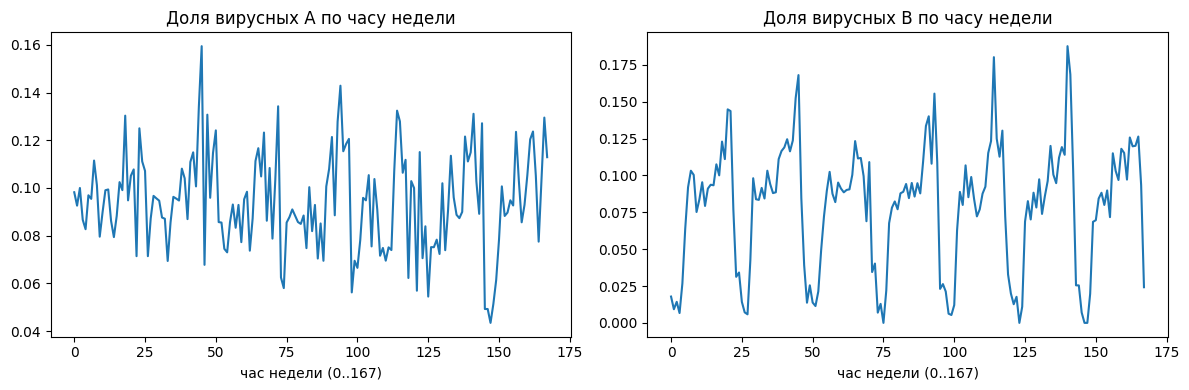

In [64]:
# доля вирусных по часам недели (для A и для B)
grid = (tgA.groupby('hour_of_week')['viral_A_24h'].mean().rename('A')
          .to_frame().join(
         tgB.groupby('hour_of_week')['viral_B_24h'].mean().rename('B'), how='outer'))

fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(grid.index, grid['A']); ax[0].set_title('Доля вирусных A по часу недели'); ax[0].set_xlabel('час недели (0..167)')
ax[1].plot(grid.index, grid['B']); ax[1].set_title('Доля вирусных B по часу недели'); ax[1].set_xlabel('час недели (0..167)')
plt.tight_layout(); plt.show()


In [66]:
# доля кейсов, где 24h=48h=72h (тонкое покрытие или быстрый saturation)
eq_24872 = (tg_h[['views_24h','views_48h','views_72h']]
            .dropna().pipe(lambda d: (d['views_24h'].eq(d['views_48h']) & d['views_48h'].eq(d['views_72h']))).mean())
print(f'Плато views 24=48=72: {eq_24872:.2%}')

# покрытие наблюдениями
coverage = {H: tg_h[f'has_{H}h'].mean() for H in [24,48,72]}
print('Покрытие по горизонтам:', coverage)

Плато views 24=48=72: 28.42%
Покрытие по горизонтам: {24: 0.9000916664638647, 48: 0.8981772164220876, 72: 0.8929205908836485}


In [16]:
import numpy as np
import pandas as pd

# posts: колонки минимум ['id_channel','date','views_24h','forwards_24h']
# 1) конверсия и подготовка типов
posts = tg_h.copy()
posts['date'] = pd.to_datetime(posts['date'], errors='coerce')
posts = posts.dropna(subset=['date'])
posts = posts.sort_values(['id_channel','date'])

# конверсия (ограничим в [0, 1], чтобы редкие артефакты не рвали шкалу)
posts['conv_fwd'] = (posts['forwards_24h'] / posts['views_24h'].clip(lower=1)).clip(0, 1)

def _mad(x):
    med = np.median(x)
    return np.median(np.abs(x - med))

def robust_z_timewindow(g: pd.DataFrame,
                        value_col='conv_fwd',
                        time_col='date',
                        window='7D',
                        center=True,
                        min_periods=10,
                        thresh=3.5):
    """Скользящее окно по времени (7 дней) с robust z-score (median/MAD). Группа = один канал."""
    # гарантируем datetime и монотонный индекс
    g = g.sort_values(time_col).copy()
    g[time_col] = pd.to_datetime(g[time_col], errors='coerce')
    g = g.dropna(subset=[time_col])

    # слишком короткие группы — просто вернём пустые колонки
    if len(g) < max(3, min_periods):
        g['roll_median'] = np.nan
        g['roll_mad'] = np.nan
        g['z_conv'] = np.nan
        g['is_anom'] = False
        return g

    # rolling по DatetimeIndex
    s = g.set_index(time_col)[value_col]

    roll = s.rolling(window=window, center=center, min_periods=min_periods)
    med = roll.median()
    madv = roll.apply(_mad, raw=True)

    z = (s - med).abs() / (1.4826 * madv.replace(0, np.nan))

    # обратно в колонки датафрейма
    g['roll_median'] = med.reindex(g.set_index(time_col).index).to_numpy()
    g['roll_mad'] = madv.reindex(g.set_index(time_col).index).to_numpy()
    g['z_conv'] = z.reindex(g.set_index(time_col).index).to_numpy()
    g['is_anom'] = (g['z_conv'] > thresh) & g['z_conv'].notna()
    return g

res = (posts
       .groupby('id_channel', group_keys=False)
       .apply(robust_z_timewindow,
              value_col='conv_fwd',
              time_col='date',
              window='7D',
              center=True,
              min_periods=10,
              thresh=3.5))

# примеры аномалий (вверх/вниз можно различать по знаку (conv - roll_median))
res['sign'] = np.sign(res['conv_fwd'] - res['roll_median'])
anom = res[res['is_anom']].sort_values(['id_channel','z_conv'], ascending=[True, False])
anom[['id_channel','date','conv_fwd','roll_median','z_conv','sign']].head(10)


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computati

,id_channel,date,conv_fwd,roll_median,z_conv,sign
120545,1,2025-09-02 07:16:19,0.035489,0.001305,33.773996,1.0
63994,1,2025-03-26 14:36:48,0.033402,0.001345,33.130042,1.0
108595,1,2025-07-31 08:55:01,0.049843,0.001813,32.323591,1.0
90418,1,2025-06-11 06:40:33,0.039640,0.001441,30.764253,1.0
43872,1,2025-01-24 08:58:28,0.040630,0.001662,29.900519,1.0
70089,1,2025-04-13 13:15:41,0.034179,0.001394,29.312879,1.0
44513,1,2025-01-27 07:46:25,0.036784,0.001646,24.854635,1.0
28545,1,2025-01-13 07:51:43,0.032323,0.001506,24.540928,1.0
22473,1,2024-12-01 09:31:10,0.033405,0.001542,24.328079,1.0
26534,1,2024-12-11 16:02:42,0.030004,0.001468,23.795462,1.0


In [19]:
res.groupby("id_channel").agg({"is_anom": "mean"})

,is_anom
id_channel,
1,0.073378
2,0.065251
3,0.089685
4,0.012237
5,0.022231
6,0.054106
18,0.028688


In [14]:
res["is_anom"].value_counts()

is_anom
False    115772
True       7501
Name: count, dtype: int64

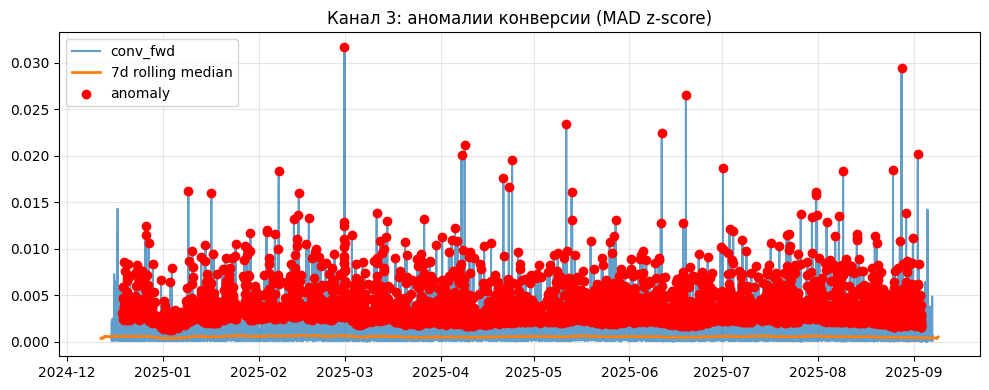

In [15]:
import matplotlib.pyplot as plt

ch = res['id_channel'].mode()[0]
sub = res[res['id_channel']==ch].sort_values('date')

plt.figure(figsize=(10,4))
plt.plot(sub['date'], sub['conv_fwd'], label='conv_fwd', alpha=0.7)
plt.plot(sub['date'], sub['roll_median'], label='7d rolling median', linewidth=2)
plt.scatter(sub.loc[sub['is_anom'],'date'], sub.loc[sub['is_anom'],'conv_fwd'],
            color='red', label='anomaly', zorder=5)
plt.title(f'Канал {ch}: аномалии конверсии (MAD z-score)')
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()
